# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# load data

In [2]:
# Check your current working directory using `os.getcwd()` below 
import os
os.getcwd()

'/Users/joeplamers/code/Alessandro1984/inflation-forecasting/notebooks'

In [12]:
#csv_path = os.path.join('..', 'data-context-and-setup', 'data', 'csv')
csv_path = os.path.join('..','raw_data')
#pd.read_csv(os.path.join(csv_path, 'olist_sellers_dataset.csv')).head()
df = pd.read_csv(os.path.join(csv_path,'data_us.csv'))

In [11]:
df

,Unnamed: 0,Time,DFF,CPIAUCSL,CPILFESL,UNRATE,WTISPLC,INDPRO,MABMM301USM189S,A576RC1
0,0,1960-01-01,3.99,1.24095,2.00669,5.2,2.97,10.03675,NaN,7.05509
1,1,1960-02-01,3.97,1.41379,2.34114,4.8,2.97,6.96284,NaN,6.78233
2,2,1960-03-01,3.84,1.51881,2.00000,5.4,2.97,4.49722,NaN,5.93518
3,3,1960-04-01,3.92,1.93237,2.00000,5.2,2.97,1.50636,NaN,5.56845
4,4,1960-05-01,3.85,1.82507,1.66113,5.1,2.97,-0.11438,NaN,4.94632
...,...,...,...,...,...,...,...,...,...,...
752,752,2022-09-01,2.56,8.21485,6.64296,3.5,84.26,4.73131,2.56370,9.07203
753,753,2022-10-01,3.08,7.76249,6.30176,3.7,87.55,3.18912,1.28501,8.07029
754,754,2022-11-01,3.78,7.13535,5.97198,3.6,84.37,1.98468,0.02623,7.43424
755,755,2022-12-01,4.10,6.44494,5.70386,3.5,76.44,1.14673,-1.31457,6.94998


In [13]:
# rename columns
df = df.rename(columns={
    "DFF": "fed_funds_rate",
    "CPIAUCSL": "CPI",
    "CPILFESL": "core_CPI",
    "UNRATE": "unemp_rate",
    "WTISPLC": "oil_price",
    "INDPRO": "index_ind_prod",
    "MABMM301USM189S": "money_supply_M3",
    "A576RC1": "wage_growth"
})

# drop "Unnamed: 0" column
df = df.drop("Unnamed: 0", axis=1)
df = df.drop('CPI',axis=1)

#set time to time 
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')
df

,fed_funds_rate,core_CPI,unemp_rate,oil_price,index_ind_prod,money_supply_M3,wage_growth
Time,,,,,,,
1960-01-01,3.99,2.00669,5.2,2.97,10.03675,NaN,7.05509
1960-02-01,3.97,2.34114,4.8,2.97,6.96284,NaN,6.78233
1960-03-01,3.84,2.00000,5.4,2.97,4.49722,NaN,5.93518
1960-04-01,3.92,2.00000,5.2,2.97,1.50636,NaN,5.56845
1960-05-01,3.85,1.66113,5.1,2.97,-0.11438,NaN,4.94632
...,...,...,...,...,...,...,...
2022-09-01,2.56,6.64296,3.5,84.26,4.73131,2.56370,9.07203
2022-10-01,3.08,6.30176,3.7,87.55,3.18912,1.28501,8.07029
2022-11-01,3.78,5.97198,3.6,84.37,1.98468,0.02623,7.43424


In [14]:
#drop NaN
df = df.dropna(how='any')

# baselining

## import relevant packages

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## create test-train split

In [17]:
X = df.drop(columns='core_CPI')
y = df['core_CPI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=False)

# Use the same function above for the validation set
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size = 0.5, shuffle=False)


X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_val.shape, X_val.shape

((520, 6), (112, 6), (520,), (112,), (112,), (112, 6))

## baseline model

let's create a basic model to use as a benchmark

In [20]:
baseline_1 = mean_squared_error(y_train, X_train["fed_funds_rate"].values)
print(f"Our first baseline give a MSE of {baseline_1}")

Our first baseline give a MSE of 8.518056530178269


# model development

## importing relevant packages

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
import seaborn as sns

**GRADIENT BOOSTER**

It is another iterative ensemble learning method that trains weak models sequentially to minimize the loss function using gradient descent. It combines the predictions of multiple decision trees to produce a final prediction with higher accuracy than any individual tree.

In [28]:
model = GradientBoostingRegressor()
cv_results = cross_validate(model, X_train, y_train, scoring = "neg_mean_squared_error", cv=5)
gradient_booster_mse = cv_results['test_score'].mean()

print(f"Our random forest give a MSE of {-(gradient_booster_mse)}")

Our random forest give a MSE of 4.537538673268428


# optimize gradient booster

Given the gradient booster has the lowest MSE, this model is used to optimize performance

In [29]:
# Fit the GradientBoostingRegressor to the training data
model.fit(X_train, y_train)

# Predict the inflation values for the validation data
y_pred = model.predict(X_val)

# Compute the MSE between the predicted and actual values for the validation data
mse = mean_squared_error(y_val, y_pred)

# Print the MSE score
print(f"Mean squared error on validation set: {mse:.2f}")

Mean squared error on validation set: 1.54


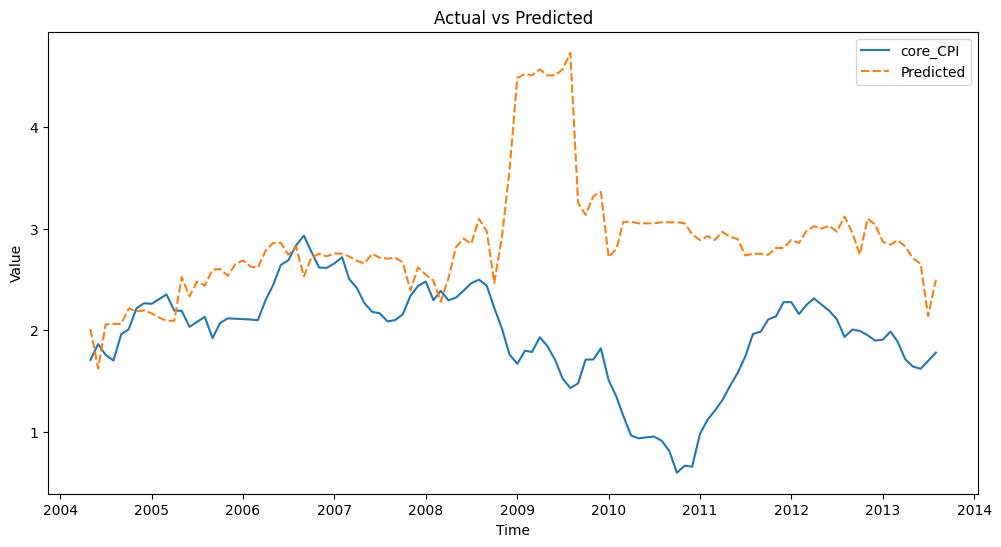

In [30]:
#plot the graph
y_pred_df = pd.DataFrame(data=y_pred, index=y_val.index, columns=['Predicted'])
combined_df = pd.concat([y_val, y_pred_df], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=combined_df, ax=ax)
ax.set(xlabel='Time', ylabel='Value', title='Actual vs Predicted')
plt.show()

## optimize hyperparameters

In [31]:
# Define the hyperparameter grid to search through
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [200,500,1000],
    'max_depth': [3, 4, 5],
    'alpha':[0.001,0.01,0.1]
}

# Create the GridSearchCV object with the GradientBoostingRegressor model and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter combination and its corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error: ", -grid_search.best_score_)


Best hyperparameters:  {'alpha': 0.001, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best mean squared error:  4.136560908834293


In [32]:
# Define the best hyperparameters from the grid search
best_learning_rate = 0.1
best_n_estimators = 100
best_max_depth = 3
best_max_features = 10 # reduced number of features used for each split
best_alpha = 0.001

# Create a new GradientBoostingRegressor with the best hyperparameters
model = GradientBoostingRegressor(
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    max_features=best_max_features,
     alpha=best_alpha
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_val, y_pred)
print("Validation set mean squared error: ", mse)

Validation set mean squared error:  1.518503055425714


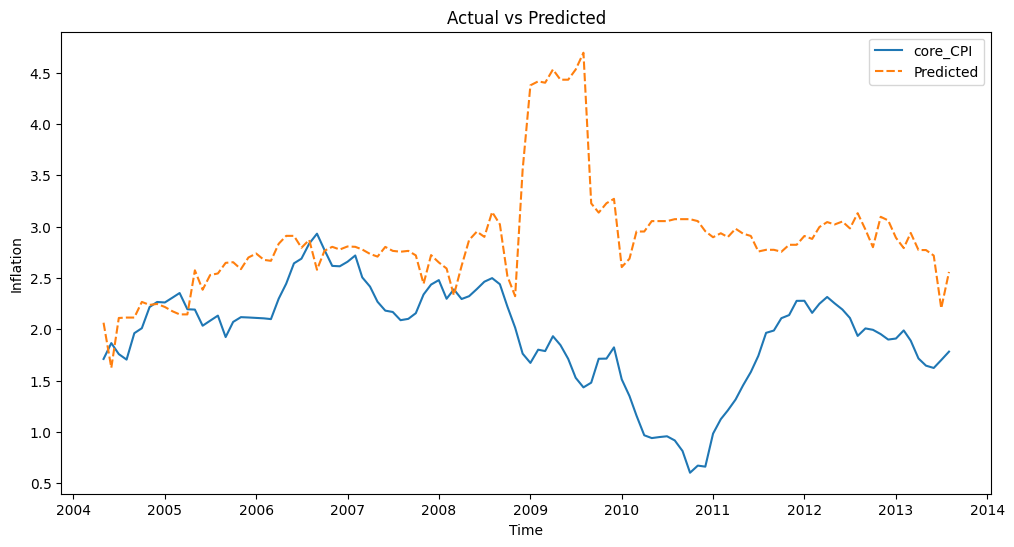

In [33]:
#plot the data
y_pred_df = pd.DataFrame(data=y_pred, index=y_val.index, columns=['Predicted'])
combined_df = pd.concat([y_val, y_pred_df], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=combined_df, ax=ax)
ax.set(xlabel='Time', ylabel='Inflation', title='Actual vs Predicted')
plt.show()

# predict test data

In [34]:
# Make predictions on the validation set
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Validation set mean squared error: ", mse)

Validation set mean squared error:  1.6779573911414123


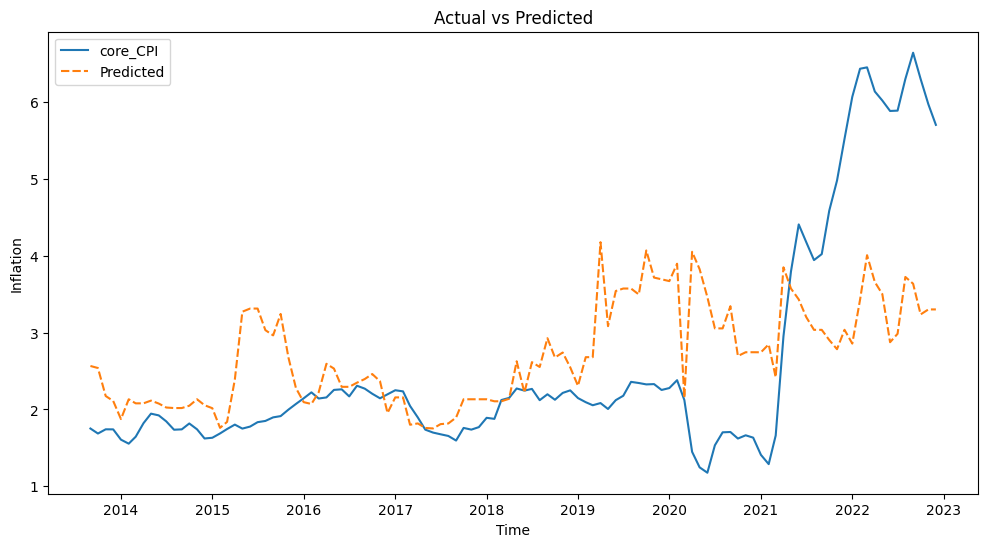

In [35]:
#plot the data
y_pred_df = pd.DataFrame(data=y_pred, index=y_test.index, columns=['Predicted'])
combined_df = pd.concat([y_test, y_pred_df], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=combined_df, ax=ax)
ax.set(xlabel='Time', ylabel='Inflation', title='Actual vs Predicted')
plt.show()

In [36]:
np.sqrt(mse)

1.2953599465559418

# check for overfitting

In [37]:
summ = model.predict(X_train) - y_train
summ.max()

1.0988090633351542

In [38]:
# Make predictions on the validation set
y_pred = model.predict(X_train)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_train, y_pred)
print("Validation set mean squared error: ", mse)

Validation set mean squared error:  0.08718069839899201


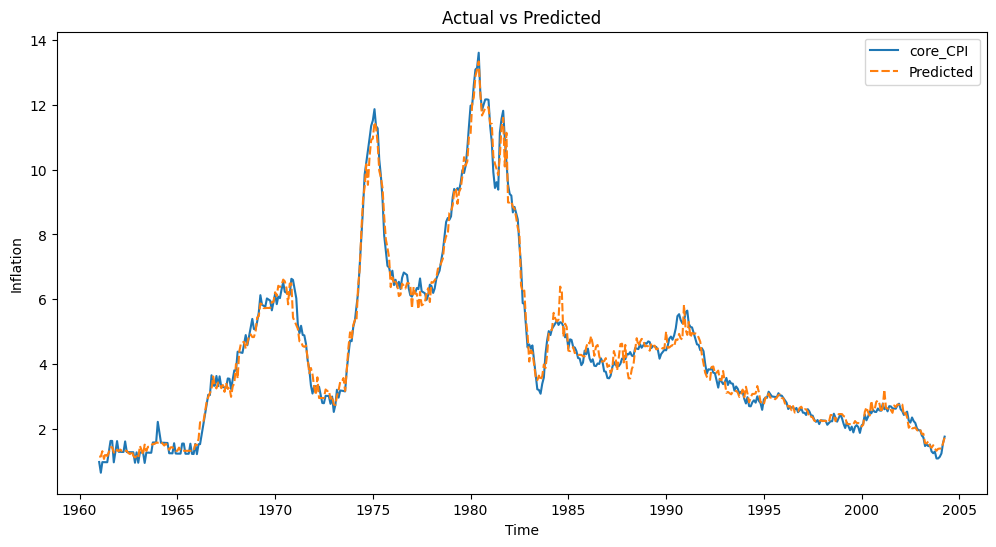

In [39]:
# Plot the data
y_pred_df = pd.DataFrame(data=y_pred, index=y_train.index, columns=['Predicted'])
combined_df = pd.concat([y_train, y_pred_df], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=combined_df, ax=ax, linestyle='-')
ax.set(xlabel='Time', ylabel='Inflation', title='Actual vs Predicted')
#ax.set_xlim(pd.Timestamp('1980-01-01'), pd.Timestamp('1981-12-31'))
plt.show()


# Train on all data

In [40]:
# Fit the GradientBoostingRegressor to the training data
model.fit(X, y)

GradientBoostingRegressor(alpha=0.001, max_features=10)

In [41]:
# Make predictions on the validation set
y_pred = model.predict(X)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y, y_pred)
print("All data mean squared error: ", mse)

All data mean squared error:  0.1017056343810089


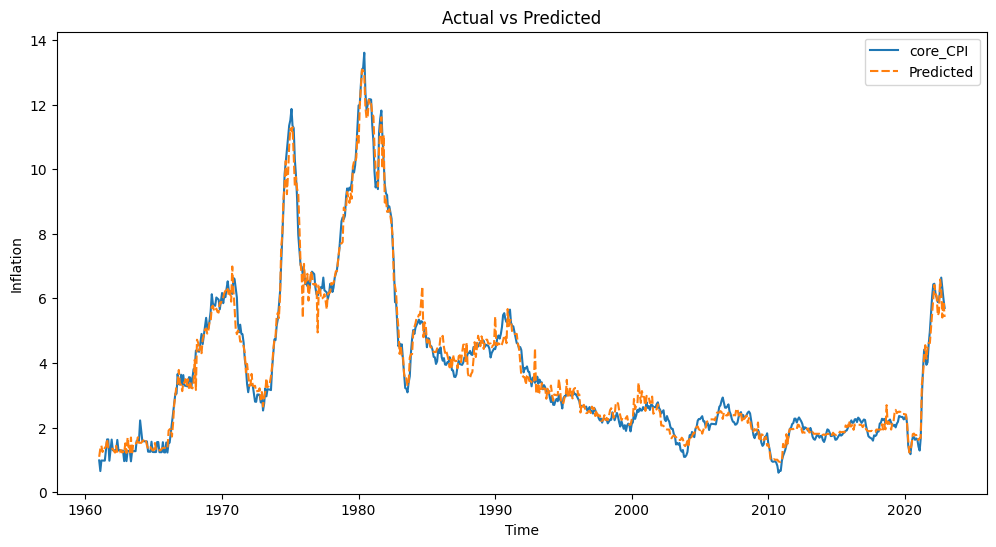

In [42]:
# Plot the data
y_pred_df = pd.DataFrame(data=y_pred, index=y.index, columns=['Predicted'])
combined_df = pd.concat([y, y_pred_df], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=combined_df, ax=ax, linestyle='-')
ax.set(xlabel='Time', ylabel='Inflation', title='Actual vs Predicted')
#ax.set_xlim(pd.Timestamp('1980-01-01'), pd.Timestamp('1981-12-31'))
plt.show()
